# CH1: 미분 자동계산

## 1.1 상자로서의 변수

### 1.1.1 변수

첫 번째 단계에서는 DeZero의 구성 요소인 ‘변수’를 만듭니다. 변수는 DeZero에서 가장 중요한 개념입니다. 이번 단계에서는 변수가 어떤 기능을 하는지 이해하고, 그 기능에 맞게 코드로 구현합니다.

* 변수: 자 box 에 데이터를 넣는 그림을 보여주며 이 ‘상자’가 바로 변수    
   * 상자와 데이터는 별개다.
   * 상자에는 데이터가 들어간다(대입 혹은 할당한다).     
   * 상자 속을 들여다보면 데이터를 알 수 있다(참조한다).    

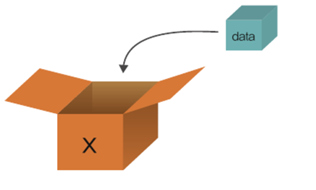

### 1.1.2 Variable 클래스 구현

변수는 영어로 variable입니다. 

그래서 DeZero에서 사용하는 변수라는 개념을 Variable이 라는 이름의 클래스로 구현하겠습니다. 


In [4]:
class Variable: # 초기화 함수 
  def __init__(self, data): # 주어진 인수를 인스턴스 변수 data에 대입
    self.data = data


In [5]:
import numpy as np
data = np.array(1.0) # 상자에 넣는 데이터
x = Variable(data) # 즉, x는 데이터 자체가 아니라 데이터를 담은 상자
print(x.data)

1.0


## 1.2 변수를 낳는 함수



### 1.2.1 함수란

* 함수: 어떤 변수로부터 다른 변수로의 대응 관계를 정한 것

### 1.2.2 Function 클래스의 구현

Variable 인스턴스를 변수로 다룰 수 있는 함수를 Function 클래스로 구현


여기서 주의할 점   
* Function 클래스는 Variable 인스턴스를 입력받아 Variable 인스턴스를 출력합니다.   
* Variable 인스턴스의 실제 데이터는 인스턴스 변수인 data에 있습니다.


In [7]:
class Function:
  def __call__(self, input):
    x = input.data # 데이터를 꺼낸다 .
    y = x ** 2 # 실제 계산
    output = Variable(y) # Variable 형태로 되돌린다 .
    return output

### 1.2.3 Function 클래스 이용

In [8]:
# Function 클래스를 실제로 사용해보죠. 
# Variable 인스턴스인 x를 Function 인스턴스인 f에 입력해보겠습니다
x = Variable(np.array(10)) 
f = Function() 
y = f(x)
print(type(y)) # type() 함수는 객체의 클래스를 알려준다 .
print(y.data)


<class '__main__.Variable'>
100


❌ 그런데 방금 구현한 Function 클래스는 함수의 기본조건을 만족시키지 못함

함수의 기본조건    
* Function 클래스는 기반 클래스로서, 모든 함수에 공통되는 기능을 구현합니다.     
* 구체적인 함수는 Function 클래스를 상속한 클래스에서 구현합니다.      



이를 위해 Function 클래스를 다음처럼 수정합니다.


**__call__ 메서드의 역할**    
* ‘Variable에서 데이터 찾기   
* ‘계산 결과를 Variable에 포장하기

In [9]:
class Function:
  def __call__(self, input):
    x = input.data 
    y = self.forward(x) # 구체적인 계산은 forward 메서드에서 한다 .
    output = Variable(y) 
    return output
  def forward(self, x):
    raise NotImplementedError()

이어서 Function 클래스를 상속하여 입력값을 제곱하는 클래스를 구현하겠습니다. 클래스 이름은 Square라고 짓고 다음과 같이 구현합니다.

In [10]:
class Square(Function): # Square 클래스는 Function 클래스를 상속 ➡️  __call__ 메서드는 그대로 계승
  def forward(self, x):
    return x ** 2

In [12]:
x = Variable(np.array(10)) 
f = Square() 
y = f(x)
print(type(y))  # 보다시피 이전과 같은 결과
print(y.data) # 보다시피 이전과 같은 결과


<class '__main__.Variable'>
100


## 1.3 함수 연결


이번 단계에서는 또 다른 함수를 구현하고 여러 함수를 조합해 계산할 수 있도록 하겠습니다.

### 1.3.1 Exp 함수 구현

In [13]:
# Square 클래스와 마찬가지로 Function 클래스를 상속한 다음 forward 메서드에서 원하는 계산을 구현
class Exp(Function):
  def forward(self, x):
    return np.exp(x)

### 1.3.2 함수 연결

In [15]:
# Function 클래스의 __call__ 메서드는 입력과 출력이 모두 Variable 인스턴스
A = Square() 
B = Exp() 
C = Square()
x = Variable(np.array(0.5)) 
a = A(x) 
b = B(a) 
y = C(b)
print(y.data)

1.648721270700128


## 1.4 수치미분

### 1.4.1 미분이란?

* 미분: ‘변화율’
   * 물체의 시간에 따른 위치 변화율(위치의 미분)은 속도가 됩니다.      
   * 시간에 대한 속도 변화율(속도의 미분)은 가속도에 해당 하죠.     
   * 이와 같이 미분은 변화율을 나타냅니다.   
   * 정확한 정의는 ‘극한으로 짧은 시간(순간)’에서의 변화량입니다.      


[수식]    
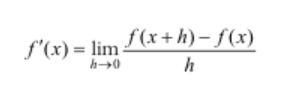






### 1.4.2 수치 미분 구현

그런데 컴퓨터는 극한을 취급할 수 없으니 h를 극한과 비슷한 값으로 대체하겠습니다. 예를 들어 h = 0.0001 (= 1e-4)과 같은 매우 작은 값을 이용하여 위의 식을 계산합니다.      


*  **수치 미분 numerical differentiation:** 이런 미세한 차이를 이용 하여 함수의 변화량을 구하는 방법


* **‘중앙차분 centered difference ’:** 수치 미분은 작은 값을 사용하여 ‘진정한 미분’을 근사합니다. 따라서 값에 어쩔 수 없이 오차가 포함되는데, 이 근사 오차를 줄이는 방법    
    * 중앙차분은 f (x)와 f (x + h)의 차이를 구하는 대신 f (x − h)와 f (x + h)의 차이를 구함     


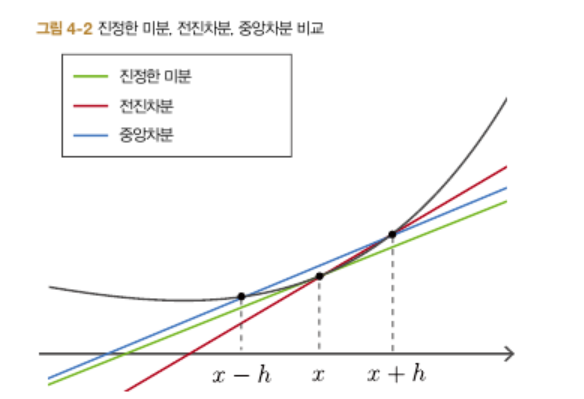

중앙차분을 이용하여 수치 미분을 계산하는 함수를 numerical_diff (f, x, eps=1e-4 ) 라는 이름으로 구현해봅시다. 
* 첫 번째 인수 f는 미분의 대상이 되는 함수로 앞에서 구현한 Function의 인스턴스    
* 두 번째 인수 x는 미분을 계산하는 변수로, Variable 인스턴스      
* 마지막의 eps는 작은 값을 나타내며, 기본값은 1e-4입니다.


In [17]:
def numerical_diff(f, x, eps=1e-4):
  x0 = Variable(x.data - eps) 
  x1 = Variable(x.data + eps) 
  y0 = f(x0) 
  y1 = f(x1) 
  return (y1.data - y0.data) / (2 * eps)

그러면 3단계에서 구현한 Square 클래스를 대상으로 미분해보겠습니다

In [18]:
f = Square() 
x = Variable(np.array(2.0)) 
dy = numerical_diff(f, x)
print(dy) #  오차가 없었다면 4.0이 나왔어야 하니, 이 결과는 거의 올바른 값이라고 할 수 있겠네요.



4.000000000004


### 1.4.3 합성함수의 미분

In [19]:
def f(x):
  A = Square() 
  B = Exp() 
  C = Square() 
  return C(B(A(x)))

x = Variable(np.array(0.5)) 
dy = numerical_diff(f, x)
print(dy)


3.2974426293330694


### 1.4.4 수치 미분의 문제점

수치 미분의 결과에는 오차가 포함되어 있습니다. 대부분의 경우 오차는 매우 작지만 어떤 계산이냐에 따라 커질 수도 있습니다.





> NOTE _ 수치 미분의 결과에 오차가 포함되기 쉬운 이유는 주로 ‘자릿수 누락’ 때문입니다. 중앙차분 등 " ‘차 이’를 구하는 계산은 주로 크기가 비슷한 값들을 다루므로 계산 결과에서 자릿수 누락이 생겨 유효 자릿수가 줄어들 수 있습니다. 예를 들어 유효 자릿수가 4일 때 1.234 - 1.233이라는 계산(비슷한 값끼리의 뺄셈)을 생각해보죠. 계산 결과는 0.001이 되어 유효 자릿수가 1로 줄어듭니다. 원래는 1.234... - 1.233... = 0.001434... 같은 결과였을지도 모르는데, 자릿수 누락 때문에 0.001이 됐다고 볼 수 있습니다. 이와 같은 원리 때문에 수치 미분을 이용하면 자릿수 누락이 발생하여 오차가 포함되기 쉽습니다.







수치 미분의 더 심각한 문제는 **계산량**이 많다는 점입니다.   
변수가 여러 개인 계산을 미분할 경우 변수 각각을 미분해야 하기 때문입니다. 신경망에서는 매개변수를 수백만 개 이상 사용하는 건일도 아니므로 이 모두를 수치 미분으로 구하는 것은 현실적이지 않습니다.   


➡️ 해결책    
역전파

## 1.5 역전파 이론

* [더 자세히 알아보기_밑딥1](https://yerimoh.github.io/DL4/)     
* [더 자세히 알아보기_CS231n](https://yerimoh.github.io/DL203/)

### 1.5.1 연쇄법칙


역전파를 이해하는 열쇠는 연쇄 법칙 chain rule 입니다. chain은 ‘사슬’이라는 뜻으로, 여러 함수를 사슬처럼 연결하여 사용하는 모습을 빗댄 것입니다. 연쇄 법칙에 따르면 합성 함수(여러 함수가 연결된 함수)의 미분은 구성 함수 각각을 미분한 후 곱한 것과 같습니다.

x에 대한 y의 미분

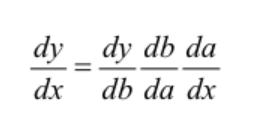

x에 대한 y의 미분은 구성 함수 각각의 미분값을 모두 곱한 값과 같습니다.   
즉, 합성 함수의 미분은 각 함수의 국소적인 미분들로 분해할 수 있습니다. 이것이 연쇄 법칙입니다. 

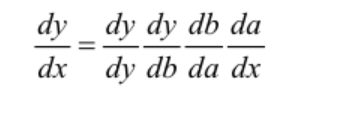

### 1.5.2 역전파 원리 도출

합성 함수의 미분은 구성 함수들의 미분의 곱으로 분해할 수 있음을 뜻합니다. ‘곱하는 순서’까지 말해주지는 않지만 사실 어떤 순서로 곱해도 상관없습니다. 


그러니 아래 식과 같이 출력에서 입력 방향으로(즉, 역방향으로) 순서 대로 계산해보겠습니다.*


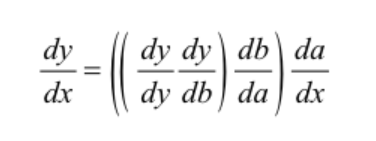

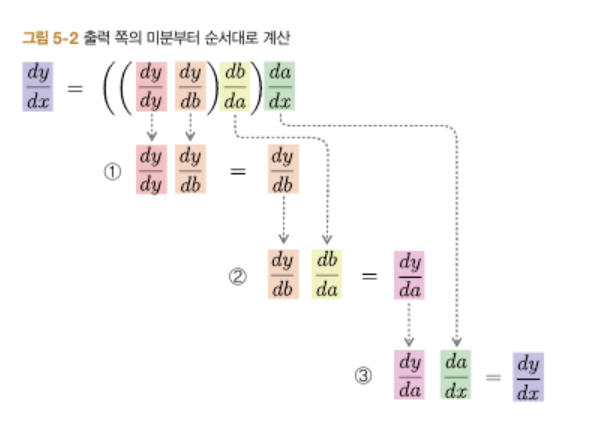

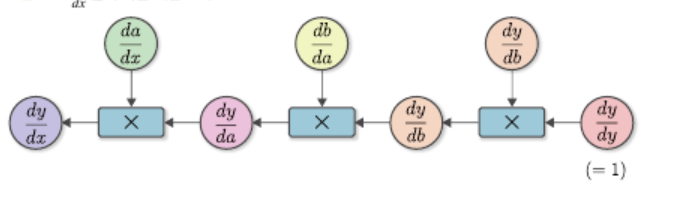

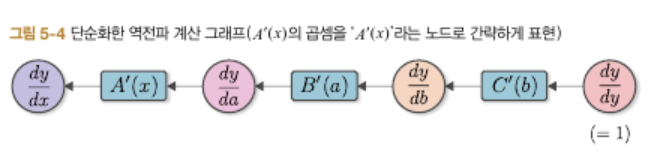